# Model train code

## 1. Image resizing

In [27]:
from PIL import Image
import glob

import numpy as np
import os
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
#local_folder = 'C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper'
#sys.path.append('C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/')


def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
    # save resize images
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

image_dir_path = "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path =  "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path =  "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/paper"
resize_images(image_dir_path)

image_dir_path = "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path =  "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path =  "C:/Users/ririk/Desktop/20230406_TEMP/DLIP_extra_project/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

C:\Users\ririk\AppData\Local\Temp\ipykernel_4204\2266283800.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


537  images resized.
500  images resized.
500  images resized.
10  images resized.
10  images resized.
10  images resized.


## 2. Load data

In [3]:
def load_data(img_path, number_of_data=1537):
    # scissor : 0, rock : 1, paper : 2
    img_size=56
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # scissor : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   # rock : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # paper : 2
        idx=idx+1
        
    print("train data number : ", idx,".")
    return imgs, labels

image_dir_path = "rock_scissor_paper" 
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # normalize

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# for test
# plt.imshow(x_train[0])
# print('label : ', y_train[0])


train data number :  1537 .
x_train shape: (1537, 56, 56, 3)
y_train shape: (1537,)


## 3. Configure CNN model

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

## 4. Train

Epoch 1/100
385/385 [==============================] - 1s 2ms/step - loss: 1.1247 - accuracy: 0.4066
Epoch 2/100
385/385 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.8009
Epoch 3/100
385/385 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9193
Epoch 4/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9740
Epoch 5/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9831
Epoch 6/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9948
Epoch 7/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.9928
Epoch 8/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 9/100
385/385 [==============================] - 1s 2ms/step - loss: 0.0402 - accuracy: 0.9902
Epoch 10/100
385/385 [==============================] - 1s 2ms/step - loss: 9.8547e-04 - ac

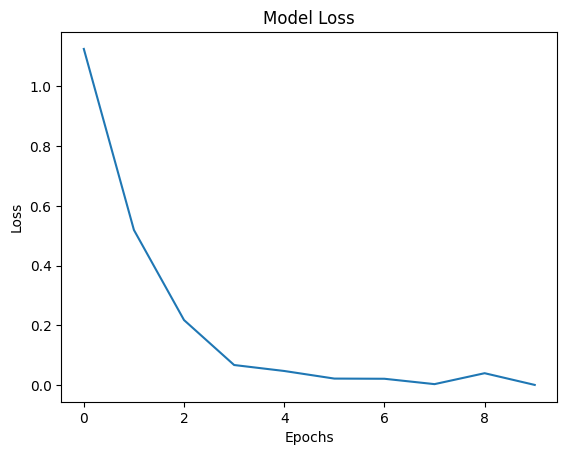

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(patience=2, monitor='loss',mode='min', min_delta=0.01, verbose=1)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train
history = model.fit(x_train_norm, y_train, 
                    epochs=100,
                    batch_size=4,  
                    callbacks=[early_stopping])

#model.fit(x_train_norm, y_train, epochs=10)

# plot loss graph
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


model.save("./rsp_model.h5")

## 5. Test

In [28]:
from PIL import Image
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sys
from tensorflow.keras.models import load_model
import cv2

model = load_model("rsp_model.h5")

def load_data(img_path, number_of_data=30):
    # scissor : 0, rock : 1, paper : 2
    img_size=56
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # scissor : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   # rock : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # paper : 2
        idx=idx+1
        
    print("train data number : ", idx,".")
    return imgs, labels

image_dir_path = "./rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))



predicted_result = model.predict(x_test_norm)	
predicted_labels = np.argmax(predicted_result, axis=1)

cor_num = 0
for idx in range(1,30):
    print(f'idx={idx}\n')
    #print('예측 결과 : ', predicted_result[idx])
    print('가장 가능성이 높은 결과 : ', predicted_labels[idx])
    print('실제 라벨 : ', y_test[idx])
    if (predicted_labels[idx] == y_test[idx]): 
        cor_num += 1

print("맞힌 개수 : ", cor_num)        



train data number :  30 .
x_test shape : (30, 56, 56, 3)
y_test shape : (30,)
1/1 - 0s - loss: 0.2286 - accuracy: 0.9333
test_loss : 0.22856636345386505
test_accuracy : 0.9333333373069763
idx=1

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=2

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=3

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=4

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=5

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=6

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=7

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=8

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=9

가장 가능성이 높은 결과 :  0
실제 라벨 :  0
idx=10

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=11

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=12

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=13

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=14

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=15

가장 가능성이 높은 결과 :  0
실제 라벨 :  1
idx=16

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=17

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=18

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=19

가장 가능성이 높은 결과 :  1
실제 라벨 :  1
idx=20

가장 가능성이 높은 결과 :  2
실제 라벨 :  2
idx=21

가장 가능성이 높은 결과 :  0
실제 라벨 :  2
idx=22

가장 가능성이 높은 결과 :